In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from sklearn import metrics


In [2]:
# Select the device to use for processing
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
# Load the validation dataset
val_data = pd.read_csv("datasets/val_dataset.csv")


In [4]:
# Prepare input features and target variable
X_val = val_data.drop("Price", axis=1).values
y_val = val_data["Price"].values
X_val_tensor = torch.tensor(X_val, dtype=torch.float32).to(device)
y_val_tensor = torch.tensor(y_val, dtype=torch.float32).to(device)


In [5]:
# Define the neural network model
class HousePriceModel(nn.Module):
    def __init__(self, input_size):
        super(HousePriceModel, self).__init__()
        self.fc1 = nn.Linear(17, 17)
        self.fc2 = nn.Linear(17, 17)
        self.fc3 = nn.Linear(17, 17)
        self.fc4 = nn.Linear(17, 17)
        self.fc5 = nn.Linear(17, 1)

    def forward(self, x):
        x = torch.relu(self.fc1(x))
        x = torch.relu(self.fc2(x))
        x = torch.relu(self.fc3(x))
        x = torch.relu(self.fc4(x))
        x = self.fc5(x)
        return x
    

In [6]:
# Define input size
input_size = X_val.shape[1]


In [7]:
# Load the trained model
model = HousePriceModel(input_size).to(device)
model.load_state_dict(torch.load("models/house_price_model.pth"))
model.eval()


HousePriceModel(
  (fc1): Linear(in_features=17, out_features=17, bias=True)
  (fc2): Linear(in_features=17, out_features=17, bias=True)
  (fc3): Linear(in_features=17, out_features=17, bias=True)
  (fc4): Linear(in_features=17, out_features=17, bias=True)
  (fc5): Linear(in_features=17, out_features=1, bias=True)
)

In [8]:
# Make predictions
with torch.no_grad():
    y_val_pred = model(X_val_tensor)


In [9]:
# # Move tensors back to CPU
y_val_pred = y_val_pred.cpu()


In [10]:
# Convert predictions to numpy array
predictions = np.round(y_val_pred.numpy().flatten()).astype(int)


In [11]:
# Print actual vs predicted prices
results_df = pd.DataFrame({'Actual Price': y_val, 'Predicted Price': predictions})
print("Actual vs Predicted Prices:")
print(results_df)


Actual vs Predicted Prices:
      Actual Price  Predicted Price
0           235000           391259
1           208000           350653
2           319000           444851
3           787000           344994
4           500000           418851
...            ...              ...
2919        219900           218306
2920        765000           893368
2921        349000           432271
2922        705000           566241
2923        292000           434876

[2924 rows x 2 columns]


In [12]:
# Check model performance
print(f'MAE: {metrics.mean_absolute_error(y_val, predictions):.4f}')
print(f'MSE: {metrics.mean_squared_error(y_val, predictions):.4f}')
print(f'RMSE: {metrics.mean_squared_error(y_val, predictions, squared=False):.4f}')
print(f'VarScore: {metrics.explained_variance_score(y_val, predictions):.4f}')


MAE: 131971.6443
MSE: 40078356296.0814
RMSE: 200195.7949
VarScore: 0.7267


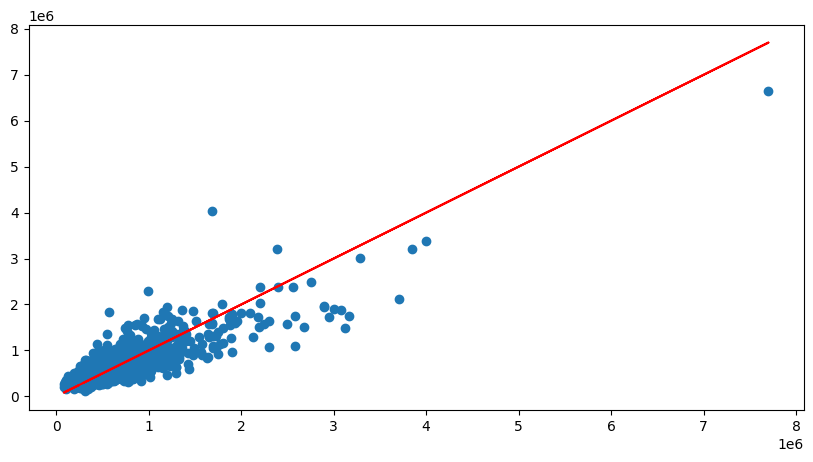

In [13]:
# Visualizing Our predictions
fig = plt.figure(figsize=(10,5))
plt.scatter(y_val, predictions)
plt.plot(y_val, y_val,'r')


In [14]:
# Check the device where the model parameters are located
device = next(model.parameters()).device

if device.type == 'cuda':
    print("Model is trained on GPU.")
else:
    print("Model is trained on CPU.")
    

Model is trained on GPU.
